<a href="https://colab.research.google.com/github/Gourab997/Aiub/blob/master/fakeNoteDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [9]:
!unzip /content/drive/MyDrive/hundred-or-thousand.zip> /hundred-or-thousand.zip

In [10]:

import os
# Directory with our training horse pictures
train_hundred_dir = os.path.join('/content/hundred-or-thousand/hundreds')

# Directory with our training human pictures
train_thousand_dir = os.path.join('/content/hundred-or-thousand/thousands')

In [11]:

train_hundred_names = os.listdir(train_hundred_dir)
print(train_hundred_names[:10])

train_thousand_names = os.listdir(train_thousand_dir)
print(train_thousand_names[:10])

['IMG_20201113_152251.jpg', 'IMG_20210416_155626.jpg', 'IMG_20210416_155747.jpg', 'IMG_20210416_153632.jpg', 'IMG_20210416_155535.jpg', 'IMG_20210416_155516.jpg', 'IMG_20201113_153012.jpg', 'IMG_20201113_151949.jpg', 'IMG_20201113_152759.jpg', 'IMG_20210416_154104.jpg']
['IMG_20201111_222105.jpg', 'IMG_20201113_145829.jpg', 'IMG_20201113_151913.jpg', 'IMG_20201113_145729.jpg', 'IMG_20201111_222041.jpg', 'IMG_20201113_155956.jpg', 'IMG_20201111_222356.jpg', 'IMG_20201113_153454.jpg', 'IMG_20201113_150007.jpg', 'IMG_20201111_221921.jpg']


In [12]:
print('total training hundred images:', len(os.listdir(train_hundred_dir)))
print('total training thousand images:', len(os.listdir(train_thousand_dir)))

total training hundred images: 87
total training thousand images: 87


In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

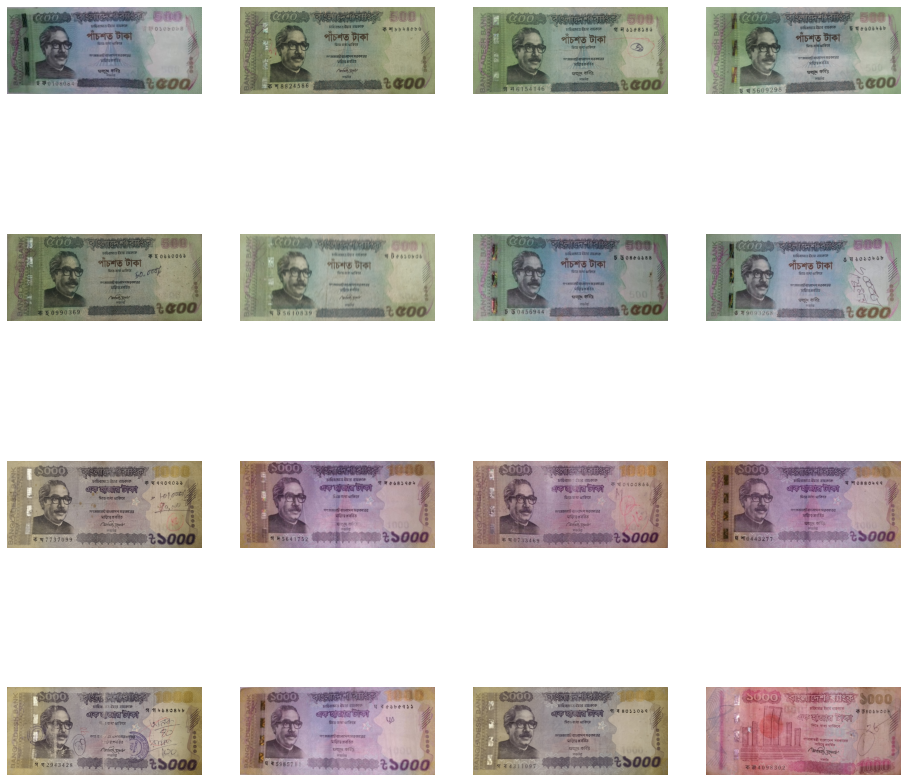

In [14]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_hundred_pix = [os.path.join(train_hundred_dir, fname) 
                for fname in train_hundred_names[pic_index-8:pic_index]]
next_thousand_pix = [os.path.join(train_thousand_dir, fname) 
                for fname in train_thousand_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_hundred_pix+next_thousand_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import tensorflow as tf

In [17]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/hundred-or-thousand/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=11,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 174 images belonging to 2 classes.


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=11,
      verbose=1)

Epoch 1/11
8/8 [==============================] - 35s 4s/step - loss: 1.7417 - accuracy: 0.5552
Epoch 2/11
8/8 [==============================] - 18s 2s/step - loss: 0.7022 - accuracy: 0.5886
Epoch 3/11
8/8 [==============================] - 7s 928ms/step - loss: 0.6982 - accuracy: 0.6683
Epoch 4/11
8/8 [==============================] - 3s 423ms/step - loss: 0.6801 - accuracy: 0.5821
Epoch 5/11
8/8 [==============================] - 4s 448ms/step - loss: 0.6816 - accuracy: 0.5411
Epoch 6/11
8/8 [==============================] - 2s 146ms/step - loss: 0.7318 - accuracy: 0.8662
Epoch 7/11
8/8 [==============================] - 2s 221ms/step - loss: 0.6429 - accuracy: 0.5946
Epoch 8/11
8/8 [==============================] - 2s 308ms/step - loss: 0.7709 - accuracy: 0.6620
Epoch 9/11
8/8 [==============================] - 1s 141ms/step - loss: 0.5716 - accuracy: 0.7947
Epoch 10/11
8/8 [==============================] - 1s 147ms/step - loss: 0.6334 - accuracy: 0.9310
Epoch 11/11
8/8 [======

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Thousand")
  else:
    print(fn + " is a Hundred")

Saving IMG_20201111_221738.jpg to IMG_20201111_221738.jpg
[1.]
IMG_20201111_221738.jpg is a Thousand
